In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Tutorial for K Means Clustering Package

###### Find the tutorial here: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

First, we're using the makeblobs function to create some data, then visualizing it with plt.scatter

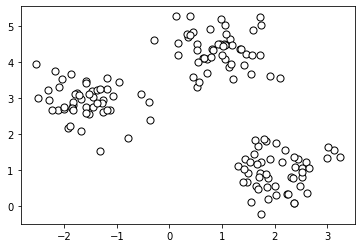

In [4]:
#create dataset of 150 randomly generated points roughly grouped into 3 regions with higher density

X, y = make_blobs(
    n_samples=150, n_features=2, 
    centers=3, cluster_std=0.5, 
    shuffle=True, random_state=0
)

#plot

plt.scatter(
    X[:, 0], X[:, 1], 
    c='white', marker='o', 
    edgecolor='black', s=50
)
plt.show()

### Our goal is to group the samples based on their feature similarities - because this is unsupervized learning keep in mind we don't have any ground truth categorical information (information provided as empirical evidence as opposed to inference).  

#### This can be achieved using the k-means algorithm, that can by summarized by the following four steps:  

1. Randomly pick *k* centroids from the sample points as initial cluster centers.  
2. Assign each sample to the nearest centroid μ^(j), j ∈ {1, …, k}.  
3. Move the centroids to the center of the samples that were assigned to it.  
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

### K-means clustering using `skicit-learn`

In [5]:
from sklearn.cluster import KMeans

Set the number of desired clusters `n` to 3, set `n_init` to 10 to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE (sum of squared errors), specify `max_iter` to 300 as the maximum number of iterations for each single run.

*Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter.*

*One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence. In the preceding code, we chose a tolerance of 1e-04 (= 0.0001).*

In [6]:
km = KMeans(
    n_clusters=3, init='random', 
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

Now that we have predicted the cluster labels y_km, let’s visualize the clusters that k-means identified in the dataset together with the cluster centroids. These are stored under the `cluster_centers_` attribute of the fitted `KMeans` object:

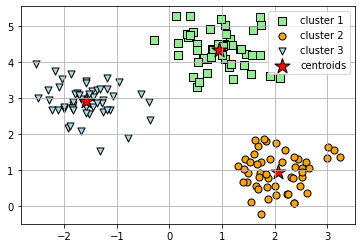

In [7]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## The Elbow Method  

#### This is a useful graphical tool to estimate the optimal number of clusters *k* for a given task. 

Intuitively we can say that if *k* increases, the within-cluster SSE will decrease because the samples will be closer to the centroids they are assigned to.

The idea behind the elboy method is to identify the value of *k* where the distortion begins to decrease the most rapidly.

*The example below will plot the distortion for different values of k.*

C:\Users\jmccall\Anaconda3\envs\geospatial\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


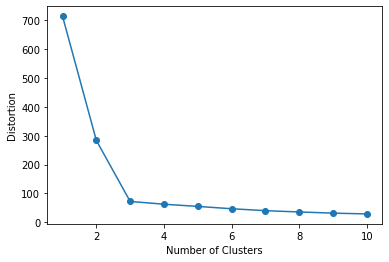

In [8]:
#calculate distortion for a range of numbers of clusters
distortions = []
for i in range (1, 11):
    km = KMeans(
    n_clusters=i, init='random', 
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    
#plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()